In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
plt.gray()
from ipywidgets import interact, fixed
external_viewer = sitk.ImageViewer()
slicer_app_location = "C:/Users/User/AppData/Local/NA-MIC/Slicer 5.0.3/Slicer.exe"
external_viewer.SetApplication(slicer_app_location)
%config Completer.use_jedi = False

<Figure size 432x288 with 0 Axes>

Part 1) Meta data embedding

a-

In [3]:
# read the data
img = sitk.ReadImage('C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment3\\new_prostate.tif')

In [4]:
# view image in external viewer
external_viewer.Execute(img)

image.png

b-

In [5]:
import pandas as pd

df = pd.read_csv('C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment3\\meta_data.csv')
print(df)

          data_name  axial (mm)  lateral (mm)  grade     organ    modality
0  PCC-0312_LAL_GS7          28         46.08      7  prostate  ultrasound


c-

The “axial” dimension - along the vertical axis - 28 mm.
“lateral” dimension - along the horizontal axis - 46.08 mm.


The lateral is almost twice as much spaced as the axial, which means that the image is elongated on the y axis (vertically)

In [6]:
# get image meta data
print('size: ',img.GetSize())
print('origin: ',img.GetOrigin())
print('spacing: ',img.GetSpacing())
print('direction: ',img.GetDirection())
print('pixel type: ',img.GetPixelIDTypeAsString())
print('number of pixel components:',img.GetNumberOfComponentsPerPixel())

size:  (512, 10048)
origin:  (0.0, 0.0)
spacing:  (1.0, 1.0)
direction:  (1.0, 0.0, 0.0, 1.0)
pixel type:  8-bit unsigned integer
number of pixel components: 1


In [7]:
#calculate spacing, spacing is equal to physical_extent/size 

spacing_x = 46.08/512
spacing_y = 28/10048

print(spacing_x)
print(spacing_y)

0.09
0.002786624203821656


In [7]:
img.SetSpacing([0.09,0.028])


TypeError: Invalid shape (5144576,) for image data

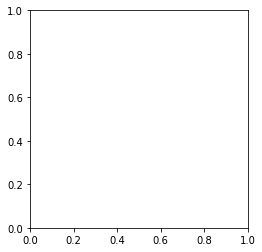

In [8]:

plt.imshow(img, cmap='gray')
plt.show() 

1-d)    screenshot new US

compare to that of part 1a)

same process for segment pic and correct metadata and screeenshot and compare

Part 2) Image enhancement

a-

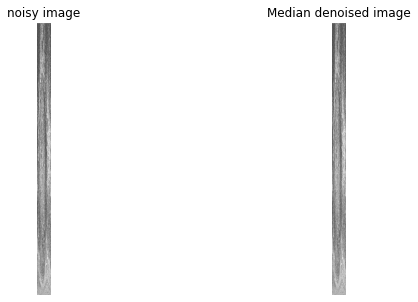

In [15]:
#Smooth prostate_ultrasound using Median filtering in SimpleITK
# median filter
median_filter = sitk.MedianImageFilter()

#Explore and visualize the result of using different kernel sizes to check its effect qualitatively. 

median_filter.SetRadius(2) ## kernel radius in 3 dimensions (in pixels)

# The goal is to decrease the noise in the prostate image without losing important anatomical information (e.g., boundary of the prostate).

img_denoised = median_filter.Execute(img)

# visualize
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:]), vmin=0, vmax=255)
plt.axis('off')
plt.title('noisy image')
plt.subplot(1,3,2)
plt.imshow(sitk.GetArrayFromImage(img_denoised[:,:]), vmin=0, vmax=255) 
plt.axis('off')
plt.title('Median denoised image')
plt.show()


b-

(array([1.100000e+02, 3.523900e+04, 4.512800e+05, 8.237760e+05,
        1.286696e+06, 1.286886e+06, 8.561140e+05, 3.523160e+05,
        5.014000e+04, 2.019000e+03]),
 array([ 39. ,  60.4,  81.8, 103.2, 124.6, 146. , 167.4, 188.8, 210.2,
        231.6, 253. ]),
 <BarContainer object of 10 artists>)

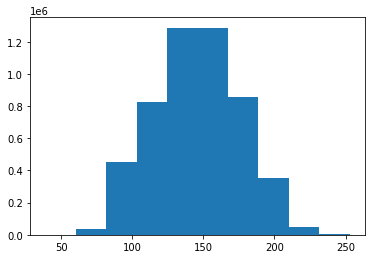

In [17]:
#Plot the histogram of the smoothed image
img_denoised_array = sitk.GetArrayFromImage(img_denoised)
plt.hist(img_denoised_array.flatten())


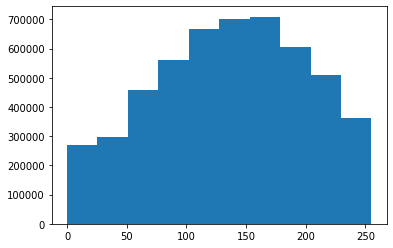

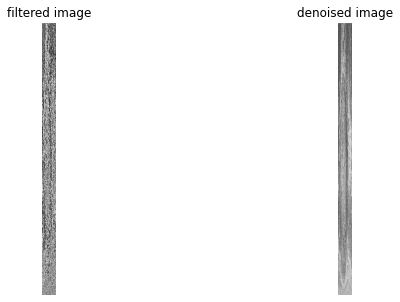

In [40]:
#Improve the contrast of the image by histogram equalization in SimpleITK using AdaptiveHistogramEqualizationImageFilter
histogram_equalization = sitk.AdaptiveHistogramEqualizationImageFilter()

#Explore different parameters and visualize the resultant image as well as its histogram. Choose the one that is qualitatively 
# more appealing.
INCLUDE THE TRIAL AND ERROR
histogram_equalization.SetAlpha(0)
histogram_equalization.SetBeta(1)
histogram_equalization.SetRadius(8)

img_filtered = histogram_equalization.Execute(img_denoised)
img_filtered_array = sitk.GetArrayFromImage(img_filtered)
plt.hist(img_filtered_array.flatten())

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:]), vmin=0, vmax=255)
plt.axis('off')
plt.title('filtered image')
plt.subplot(1,3,2)
plt.imshow(sitk.GetArrayFromImage(img_denoised[:,:]), vmin=0, vmax=255) 
plt.axis('off')
plt.title('denoised image')
plt.show()

Part 3) Segmentation

a- First you need to determine seed locations and the pixel intensity range. Open the enhanced image from Part 2 in 3D slicer using external viewer of SimpleITK. Hover your mouse inside and outside the prostate region and check the range of the intensities. The goal is to have a rough idea of what pixel intensities can be found in the prostate region. Include the ranges of the intensities within and outside of the prostate in your notebook.



b. Using fiducials, locate 4 different points inside the prostate region and include the location of these points in LPS in your notebook. Also, include a screenshot of the fiducial locations on the 3D Slicer view.



c. Apply the region growing segmentation using ConfidenceConnected algorithm available in SimpleITK. For each method, explore and visualize the effect of different seed points (that you extracted in part 3.b) and intensity ranges and check the segmentation. Include the parameters and that you try in your notebook. Pick the parameters that generate the segmentation closest to the reference segmentation (prostate_segemnt.nrrd). You must explore different parameters and show the results of this exploration explicitly.



d. Use the overlay function in SimpleITK to show the best segmentation mask overlaid on the image frame. How your result is different from the reference segmentation?

Part 4) Deriving Prostate Information

In [ ]:

#a. Calculate the area of prostate cross section in mm2 (use the spacing information and the number of pixels in the prostate segemnt).

#b. The shape of the prostate in the 3D space is often approximated by an ellipsoid. The volume of an ellipsoid can be calculated as:
#𝑉=43Ac  where A and c are the area of the 2D cross section and the radius in third dimension respectively. 
# Calculate the volume of the prostate in CC, by assuming the third radius is c = 15 mm


#c. Calculate the mean and standard deviation of the pixel intensities of the main image inside the prostate region.